# Laboratorio Modulo C - scikit learn - Unsupervised Learning

# Clustering


In [1]:
from sklearn import datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random

Importo kmeans

In [2]:
from sklearn.cluster import KMeans

Posso analizzare la bontà del clustering ottenuto calcolando il silhouette score: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [3]:
from sklearn.metrics import silhouette_score

Esempio didattico: dati sintetici.

Silhouette score: 0.8046471668186618
Etichette per ogni punto: [0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0
 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2
 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3
 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1
 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1 0
 2 3 1 0 2 3 1 0 2 3 1 0 2 3 1]
Centroidi: [[1.47001114 1.57104689]
 [7.53962371 7.46083603]
 [3.50338751 3.51089136]
 [5.46649591 5.50481469]]


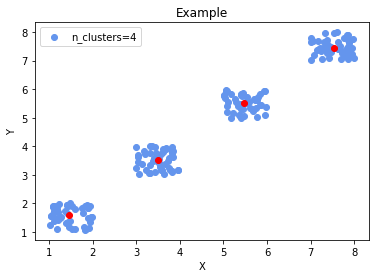

In [30]:
n_samples = 50
delta_1 = 1
delta_2 = 3
delta_3 = 5
delta_4 = 7

X_synth = []

for i in range(n_samples):
    X_synth.append((random.random() + delta_1, random.random() + delta_1))
    X_synth.append((random.random() + delta_2, random.random() + delta_2))
    X_synth.append((random.random() + delta_3, random.random() + delta_3))
    X_synth.append((random.random() + delta_4, random.random() + delta_4))


X_plot = [Xs for Xs, Ys in X_synth]
Y_plot = [Ys for Xs, Ys in X_synth]

# seleziono kmeans con 4 cluster
n_clusters = 4

estimator = KMeans(n_clusters=n_clusters)
estimator.fit(X_synth)
score = silhouette_score(X_synth, estimator.labels_)

print(f"Silhouette score: {score}")
print(f"Etichette per ogni punto: {estimator.labels_}")
print(f"Centroidi: {estimator.cluster_centers_}")

plt.figure()
plt.scatter(X_plot, Y_plot, color="cornflowerblue", label=f"n_clusters={n_clusters}")

for c in estimator.cluster_centers_:
    plt.scatter(c[0], c[1], color="red")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Example")
plt.legend()
plt.show()



**Domanda:** graficare l'andamento dei centri dei cluster aumentando il numero di cluster. Come varia il silohuette score?

Vediamo ora il clustering applicato sul dataset IRIS https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py

In [5]:
np.random.seed(5)
iris = datasets.load_iris()
X = iris.data

In [6]:
# seleziono kmeans con 5 cluster
n_clusters = 5
estimator = KMeans(n_clusters=n_clusters)

# fit
estimator.fit(X)

KMeans(n_clusters=5)

Mostro i risultati

In [31]:
estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8))
]

# reimposto la colormap
# plt.set_cmap('jet')

# il seguente codice serve per mostrare i grafici
fignum = 1
kmeans_labels = []
kmeans_cluster_centers = []
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
    ax.set_position([0, 0, 0.95, 1])
    est.fit(X)
    labels = est.labels_
    kmeans_labels.append(labels)
    kmeans_cluster_centers.append(est.cluster_centers_)

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(name)
    ax.dist = 12
    fignum = fignum + 1


fig.show()

0.6758892734684281
0.6363173385032534
0.8046471668186618
0.7077508211625957
0.607096353010778
0.49113425301514674
0.38438654667809274


**Domanda**: quali parametri posso modificare per controllare il comportamento dell'algoritmo? Provare ad aggiungere degli elementi nella lista `estimators` così da graficarli.

In [8]:
print(silhouette_score(X, kmeans_labels[0]))

0.35006029596867255


**Esercizio:** modificare il codice precedente per stampare il silhouette score per clustering eseguito con numero di cluster che varia da 2 a 10.

In [32]:
for nc in range(2,9):
    est = KMeans(n_clusters=nc)
    est.fit(X_synth)
    labels = est.labels_
    score = silhouette_score(X_synth, est.labels_)
    print(score)

0.6758892734684281
0.6363173385032534
0.8046471668186618
0.7077508211625957
0.6073649540875529
0.5034493120685756
0.3799848098758653


# Regole associative

Vediamo ora come utilizzare le regole associative e l'algoritmo apriori.
Ci serve un'ulteriore dipendenza: `mlxtend` http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

In [9]:
!pip install mlxtend

Partiamo dal seguente dataset

In [10]:
dataset = [['Latte', 'Cipolla', 'Banana', 'Fagioli', 'Uova', 'Yogurt'],
           ['Kiwi', 'Cipolla', 'Banana', 'Fagioli', 'Uova', 'Yogurt'],
           ['Latte', 'Mela', 'Fagioli', 'Uova'],
           ['Latte', 'Pera', 'Mais', 'Fagioli', 'Yogurt'],
           ['Mais', 'Cipolla', 'Cipolla', 'Fagioli', 'Gelato', 'Uova']]

La libreria richiede il processamento dei dati

In [11]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Banana,Cipolla,Fagioli,Gelato,Kiwi,Latte,Mais,Mela,Pera,Uova,Yogurt
0,True,True,True,False,False,True,False,False,False,True,True
1,True,True,True,False,True,False,False,False,False,True,True
2,False,False,True,False,False,True,False,True,False,True,False
3,False,False,True,False,False,True,True,False,True,False,True
4,False,True,True,True,False,False,True,False,False,True,False


Calcoliamo quali itemset hanno almeno supporto 60%.

In [12]:
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.6,(Cipolla)
1,1.0,(Fagioli)
2,0.6,(Latte)
3,0.8,(Uova)
4,0.6,(Yogurt)
5,0.6,"(Fagioli, Cipolla)"
6,0.6,"(Uova, Cipolla)"
7,0.6,"(Latte, Fagioli)"
8,0.8,"(Uova, Fagioli)"
9,0.6,"(Fagioli, Yogurt)"


Posso combinare supporto e lunghezza delle regole

In [18]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
# aggiungo la lunghezza
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Cipolla),1
1,1.0,(Fagioli),1
2,0.6,(Latte),1
3,0.8,(Uova),1
4,0.6,(Yogurt),1
5,0.6,"(Fagioli, Cipolla)",2
6,0.6,"(Uova, Cipolla)",2
7,0.6,"(Latte, Fagioli)",2
8,0.8,"(Uova, Fagioli)",2
9,0.6,"(Fagioli, Yogurt)",2


In [16]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.5) ]

,support,itemsets,length
10,0.6,"(Uova, Fagioli, Cipolla)",3
